# IP Experiment No. 10: Discrete Cosine Transform and Image Compression<br>



- Name: Sachi Shah
- Roll No.: C094
- Batch: EC1
- Sap Id: 70321018081

Aim: <br>
1. Apply 2D-Discrete Cosine Transform on the given test image.
2.	Obtain compression ratio between the test image and reconstructed image using selected number of highest energy coefficients of the transformed image are retained.
Comment on the subjective quality of the reconstructed image.

Theory:<br>

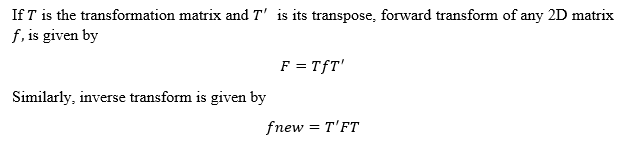

DCT Transform
1. Real valued and unitary
2. Basis vectors are sampled form of cosine signal
3. Widely used for image compression 


In [ ]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct

# To generate the DCT transform matrix 

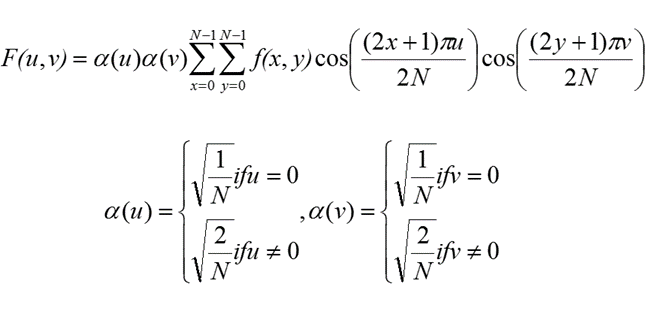

A 4 x 4 DCT cosine transform <br>
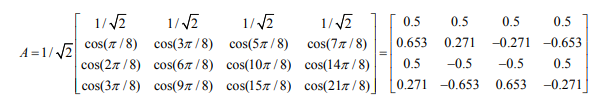

# To compute DFT of 1D matrix<br> 


Example:
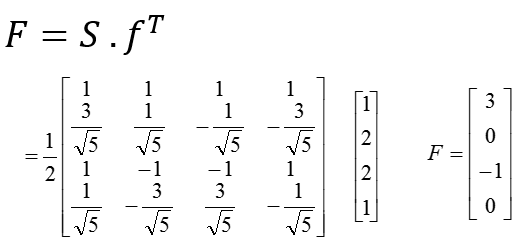

In [ ]:
# five input array f from above example, compute the 1D DCT and display the value
x = [1, 2, 2, 1]
X = dct(x, norm='ortho')
print('DCT Transform: ', X)


DCT Transform:  [ 3.  0. -1.  0.]


# To recover the original matrix using inverse DCT 

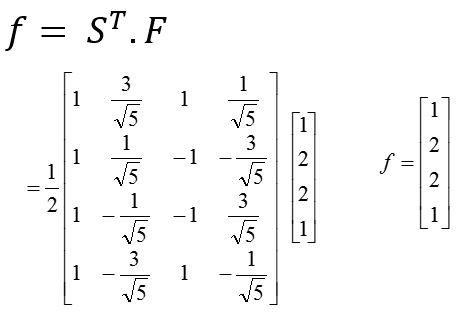

In [ ]:
# compute the Inverse DCT of the above transformed image F
x_rec = idct(X, norm='ortho')
print('Recovered x: ', x_rec)

Recovered x:  [1. 2. 2. 1.]


# Generate 2D DCT of given matrix

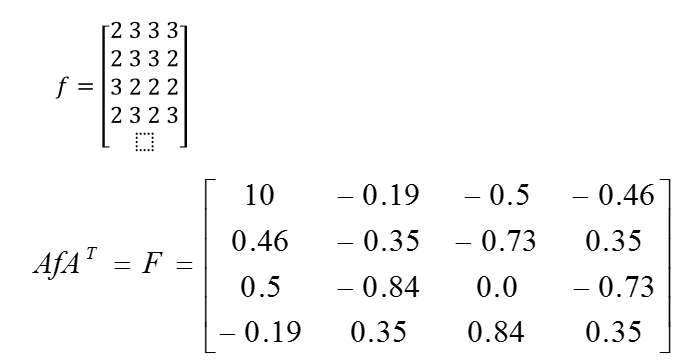

In [ ]:
# Compute the 2D DCT for the input f given in above example
x = [
     [2, 3, 3, 3],
     [2, 3, 3, 2],
     [3, 2, 2, 2],
     [2, 3, 2, 3]
]

X = dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho')
print('DCT Transform: ', X)


DCT Transform:  [[10.         -0.19134172 -0.5        -0.46193977]
 [ 0.46193977 -0.35355339 -0.73253782  0.35355339]
 [ 0.5        -0.8446232   0.         -0.73253782]
 [-0.19134172  0.35355339  0.8446232   0.35355339]]


Inverse DCT <br>

In [ ]:
# conpute the inverse DCT of F 
x_rec = idct(idct(X, axis=0, norm='ortho'), axis=1, norm='ortho')
print('Recovered x: ', x_rec)


Recovered x:  [[2. 3. 3. 3.]
 [2. 3. 3. 2.]
 [3. 2. 2. 2.]
 [2. 3. 2. 3.]]


#To find the DCT of an image 

In [ ]:
#Function to implement 2D DCT and IDCT
def dct2(a):
  return dct(dct(a, axis=0, norm= "ortho"), axis= 1, norm="ortho")

In [ ]:
def idct2(a):
  return idct(idct(a, axis=0, norm="ortho"), axis=1, norm="ortho")

(-0.5, 511.5, 511.5, -0.5)

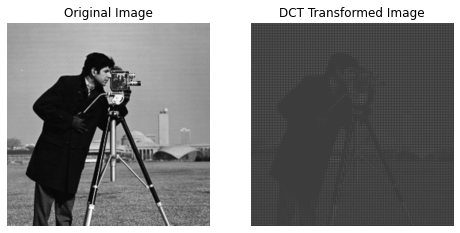

In [ ]:
# Read the input image
img = cv2.imread('cameraman.tif', 0)

# Compute the rows and columns of the image
r, c = img.shape

# Define a imgdct matrix of zeros of size of the image which is to be filled with the DCT coefficents during the computation
img_dct = np.zeros((r, c), dtype=int)

# Since the DCT matrix is a 4x4 matrix , we have to take 4x4 matrix of image and then apply DCT to each section
n = 4
for i in range(0, r//n):
  for j in range(0, c//n):
      block = img[i*n:(i+1)*n, j*n:(j+1)*n]
      img_dct[i * n:(i + 1) * n, j * n:(j + 1) * n] = dct2(block)

#plot the DCT transformed image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_dct, cmap='gray')
plt.title('DCT Transformed Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

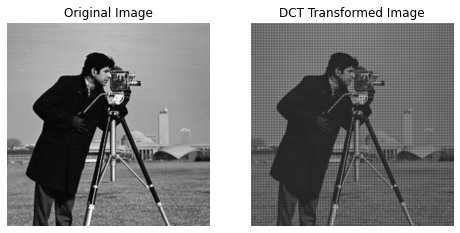

In [ ]:
# Read the input image
img = cv2.imread('cameraman.tif', 0)

# Compute the rows and columns of the image
r, c = img.shape

# Define a imgdct matrix of zeros of size of the image which is to be filled with the DCT coefficents during the computation
rimg_dct = np.zeros((r, c), dtype=int)

# Since the DCT matrix is a 4x4 matrix , we have to take 4x4 matrix of image and then apply DCT to each section
n = 4

for i in range(0, r//n):
  for j in range(0, c//n):
      block = img_dct[i*n:(i+1)*n, j*n:(j+1)*n]
      rimg_dct[i * n:(i + 1) * n, j * n:(j + 1) * n] = dct2(block)

#plot the DCT transformed image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rimg_dct, cmap='gray')
plt.title('DCT Transformed Image')
plt.axis('off')

#For compression we retain the first few coefficients having 1% of total energy

Find the total energy of the original image <br>
$Total Energy = sum|F(x,y)|^2$

In [ ]:
# compute the total energy of the image using the formula given above


#Total energy of image
E = np.sum(img**2)


Compute P = 1% of the total energy 

In [ ]:
# compute 1% of the total energy
#we want 1% of TE of image as we wish to retain only those coeffiecients in img dct which  is having E>0.01*P
P = 0.01*E


Select those coefficients in the Transformed image which have more than 1% energy from Transformed coefficients

In [ ]:
# Retain only those coefficients for imagdct which are > 1% of total energy
compressed_blurred = np.where(img_dct**2>P, img_dct, 0)     #Blurs the image

In [ ]:
#Find IDCT of the imgdct matrix of the retained coefficeints 
r,c = img.shape
img_rec = np.zeros((r,c),dtype=int)
for i in range(0,r//n):
    for j in range(0,c//n):
        temp = compressed_blurred[i*n:(i+1)*n,j*n:(j+1)*n]
        img_rec[i*n:(i+1)*n,j*n:(j+1)*n] = idct2(temp)

(-0.5, 511.5, 511.5, -0.5)

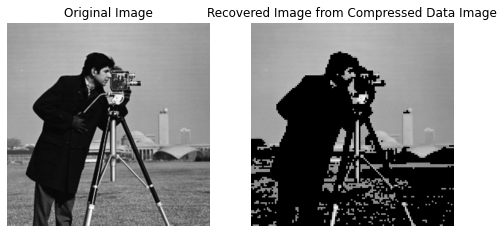

In [ ]:
#Plott the original and the compressed image
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rec, cmap='gray',vmin=0,vmax=255)
plt.title('Recovered Image from Compressed Data Image')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

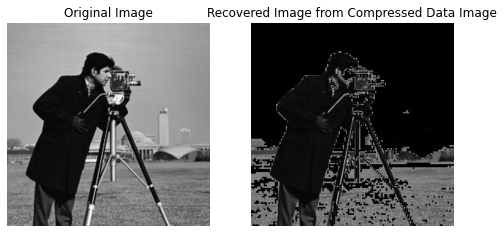

In [ ]:
# Retain only those coefficients for imagdct which are < 1% of total energy
compressed_edges = np.where(img_dct**2<P, img_dct, 0)    # Gives edges

#Find IDCT of the imgdct matrix of the retained coefficeints 
img_rec2 = np.zeros((r,c),dtype=int)
for i in range(0,r//n):
    for j in range(0,c//n):
        temp2 = compressed_edges[i*n:(i+1)*n,j*n:(j+1)*n]
        img_rec2[i*n:(i+1)*n,j*n:(j+1)*n] = idct2(temp2)

#Plott the original and the compressed image
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rec2, cmap='gray',vmin=0,vmax=255)
plt.title('Recovered Image from Compressed Data Image')
plt.axis('off')

Compression Ratio = size after compression/size before compression

In [ ]:
#Finding the nonzero values in the Inew matrix
non_zero = np.count_nonzero(compressed_blurred)

In [ ]:
#Total coefficients in the original image
total_coeff = r*c

In [ ]:
# compute the compression ratio by calculating CR=number of non-zero coefficients/total number of coefficeints
CR = (non_zero/total_coeff)*100
print("Compression Ratio = ",CR,"%")

Compression Ratio =  3.28826904296875 %


# Conclusion 

1. We implemented the code for Discrete Cosine Transform(DCT) for 1D Array, 2D Array and Image.
2. We implemented the code for Image Compression using DCT and observed that by retaining low frequency coefficients of the DCT Transformed image results in blurring of image while retaining the high frequency coefficients results in egdes.
3. Compression Ratio of the compressed image was calculated as the ratio of number of non zero coefficients to the total coefficients.
4. We achieved compression ratio of 3.3% by retaining the coefficients having energy greater than 0.01% of total image energy.